# Instacart - Exploring & Visualizing Order Data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")

aisles = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


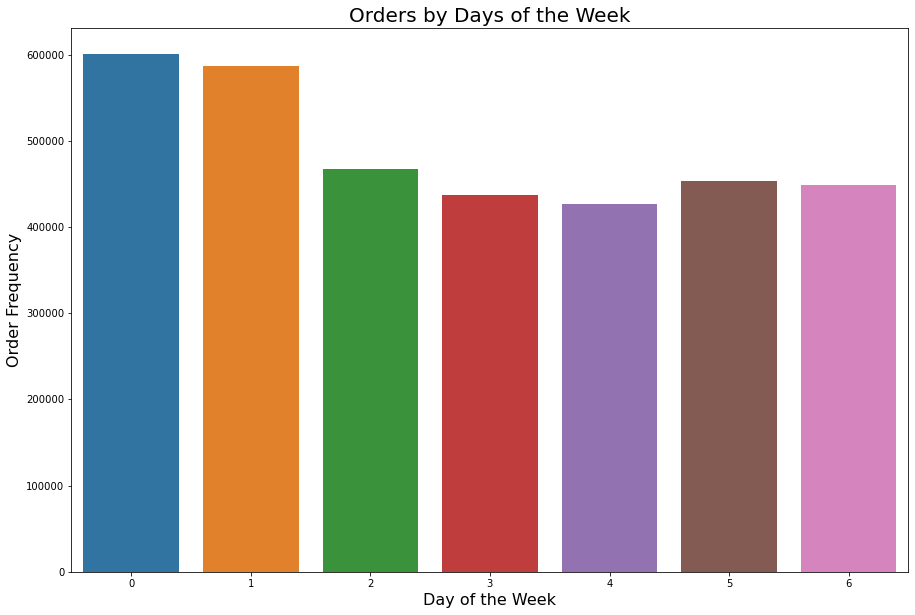

In [4]:
# Number of orders by days of the week

plt.figure(figsize=(15,10))
sns.countplot(x="order_dow", data=orders)

plt.title("Orders by Days of the Week", fontsize =20)
plt.xlabel('Day of the Week', fontsize = 16)
plt.ylabel('Order Frequency', fontsize = 16)

plt.savefig("orders_dow.png")

# Researched if Day 0 or 1 had a standard meaning in Data Science...
# Found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html
    # DatetimeIndex.weekday is a pandas function (we don't use it here)
    # The day of the week with Monday=0, Sunday=6.
    # Return the day of the week. 
    # It is assumed the week starts on Monday, 
    # which is denoted by 0 and ends on Sunday which is denoted by 6. 
    # This method is available on both Series with datetime values (using the dt accessor)
    # or DatetimeIndex.

Analysis of the above graph: Days 0 and 1 are the days with the most orders. According to our evidence in the above cell, we will assume that Day 0 is Monday and Day 1 is Tuesday.  

Optional to include...

However, we do acknowledge the chance of our assumption being wrong and the days of the week being indexed differently.  The only this a change in index would affect would be our presumptions of Instacart users' lifestyles on those given days. An example of this would be suggesting that people order more on Mondays (0) because they didn't get their shopping done over the weekend and need key items delivered to start their week.  If Sundays were 0 then as humans we might suggest that people are lazy on Sundays and want their grocery items delivered.  

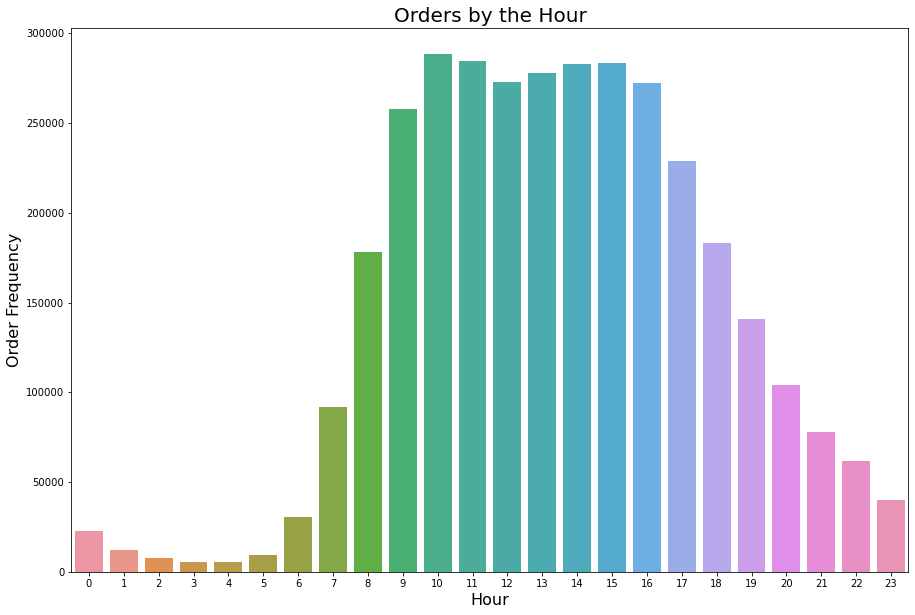

In [5]:
# Orders by the hour

plt.figure(figsize=(15,10))
sns.countplot(x="order_hour_of_day", data=orders)

plt.xlabel('Hour', fontsize=16)
plt.ylabel('Order Frequency', fontsize = 16)
plt.title("Orders by the Hour", fontsize = 20)

plt.savefig("orders_hour.png")

Analysis of the above graph: First, we acknowledge that hour 0 corresponds to midnight and hour 23 would be 11pm. (Following the standard 24 hr time clock, source: https://simple.wikipedia.org/wiki/24-hour_clock). The busiest hours of the day appear to be between hours 9 and 17 - during "working hours." We note that these order frequencies by the hour are considered across all seven days of the week. A further breakdown of weekend vs. weekday hours will yield more specific results. See below.

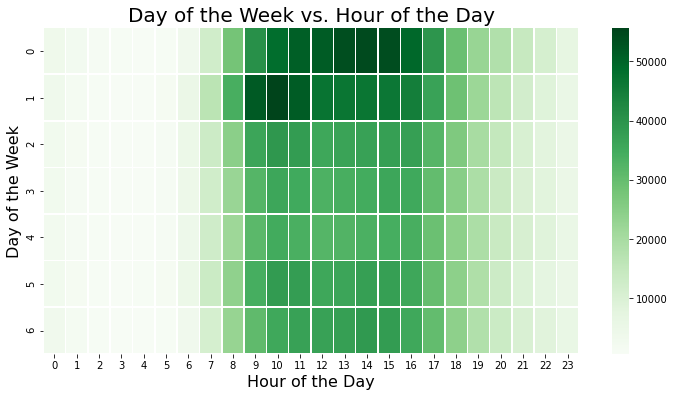

In [7]:
df_ordertimes = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
df_ordertimes = df_ordertimes.pivot('order_dow', 'order_hour_of_day', 'order_number')
# Used these sources (and too much time):
# https://www.geeksforgeeks.org/python-pandas-dataframe-aggregate/
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://www.districtdatalabs.com/data-exploration-with-python-3


plt.figure(figsize=(12, 6))
sns.heatmap(df_ordertimes, cmap = 'Greens', linewidths=0.5) # green gradient, add white gridlines

plt.title("Day of the Week vs. Hour of the Day", fontsize = 20)
plt.xlabel("Hour of the Day", fontsize =16)
plt.ylabel("Day of the Week", fontsize = 16)

plt.savefig("heatmap_order_dayvshour.png") #save the figure

Analysis of the above graph:
    
We see the most popular days agree with our previous graph on days of the week: Day 0 and Day 1. Furthermore, we see the most order traffic on Day 0 afternoons and Day 1 mornings.

In [8]:
# ideas:

# consider frequency or relative frequency for all stats on number of orders by aisle or dept

# general order vs. reorder; look at most popular only?
# make order vs. reorder a ratio - plot across the departments?
# re order by dow and hour as well?
# percent rel freq by department - full distribution

In [9]:
np.where(orders)

(array([      0,       0,       0, ..., 3421082, 3421082, 3421082],
       dtype=int64),
 array([0, 1, 2, ..., 4, 5, 6], dtype=int64))

In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
#re do the dataframe and save as new (it was pivoted from heatmap)
df_times = orders.loc[:, 'order_dow':'order_hour_of_day' ]


### Peak times from heat map are:
# Day 0, hours 13, 14, 15
# Day 1, hours 9, 10

# reduce dataframe to day 0 and day 1 only

df_times.head()
#dow = np.array(orders.order_dow)
#hours = np.array(orders.order_hour_of_day)
#for i in order_dow and j in order_hour_of_day

# pull days 0 and 1 only
#source: https://chrisalbon.com/python/data_wrangling/pandas_select_rows_when_column_has_certain_values/

val = [0,1]
df_zerone = df_times[df_times.order_dow.isin(val)]
df_zerone


,order_dow,order_hour_of_day
6,1,9
7,1,14
8,1,16
13,1,10
18,1,15
...,...,...
3421067,1,22
3421072,1,10
3421074,0,16
3421080,1,12


In [12]:
# from Liz and Victoria's code - want to use their "df_mega"

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from numpy import set_printoptions
from pandas import set_option
import pandas as pd
import numpy as np

filename = 'aisles.csv'
fn2 = 'products.csv'
fn3 = 'departments.csv'
train = 'order_products__train.csv'
orders = 'orders.csv'
df_orders = read_csv(orders)
df_train = read_csv(train)
df_aisle = read_csv(filename)
df_products = read_csv(fn2)
df_aisleprod = df_aisle.merge(df_products)
df_dep = read_csv(fn3)
df_apd = df_aisleprod.merge(df_dep)

def_order = df_train.merge(df_products)
df_order = def_order.merge(df_orders)
df_order
df_mega = df_order.merge(df_apd)

In [13]:
df_mega.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt,dairy eggs


In [14]:
### Peak times from heat map are:
#   Day 0, hours 13, 14, 15
#   Day 1, hours 9, 10


# pull days 0 and 1 only
#source: https://chrisalbon.com/python/data_wrangling/pandas_select_rows_when_column_has_certain_values/
days_val = [0,1]
df_zerone = df_mega[df_mega.order_dow.isin(days_val)]

df_zerone.describe() #down to 530,004 items


# pull day 0 and day 1 each into their own for analysis later
day_0 = df_zerone.loc[df_zerone['order_dow'] == 0]
day_1 = df_zerone.loc[df_zerone['order_dow'] == 1]
print("day 0 number of orders: ", len(day_0))
print("day 1 number of orders: ", len(day_1))
 
# pull hours 13, 14, 15 for day 0 and hours 9, 10 for day 1
peakhrs_0 = [13, 14, 15]
peakhrs_1 = [9, 10]
day0_peak = day_0.loc[day_0['order_hour_of_day'].isin(peakhrs_0)]
print("Day 0 peak hours (9 and 10) number of orders: ", len(day0_peak))
day1_peak = day_1.loc[day_1['order_hour_of_day'].isin(peakhrs_1)]
print("Day 1 peak hours (13, 14, 15) number of orders: ", len(day1_peak))



day 0 number of orders:  324026
day 1 number of orders:  205978
Day 0 peak hours (9 and 10) number of orders:  88942
Day 1 peak hours (13, 14, 15) number of orders:  33504


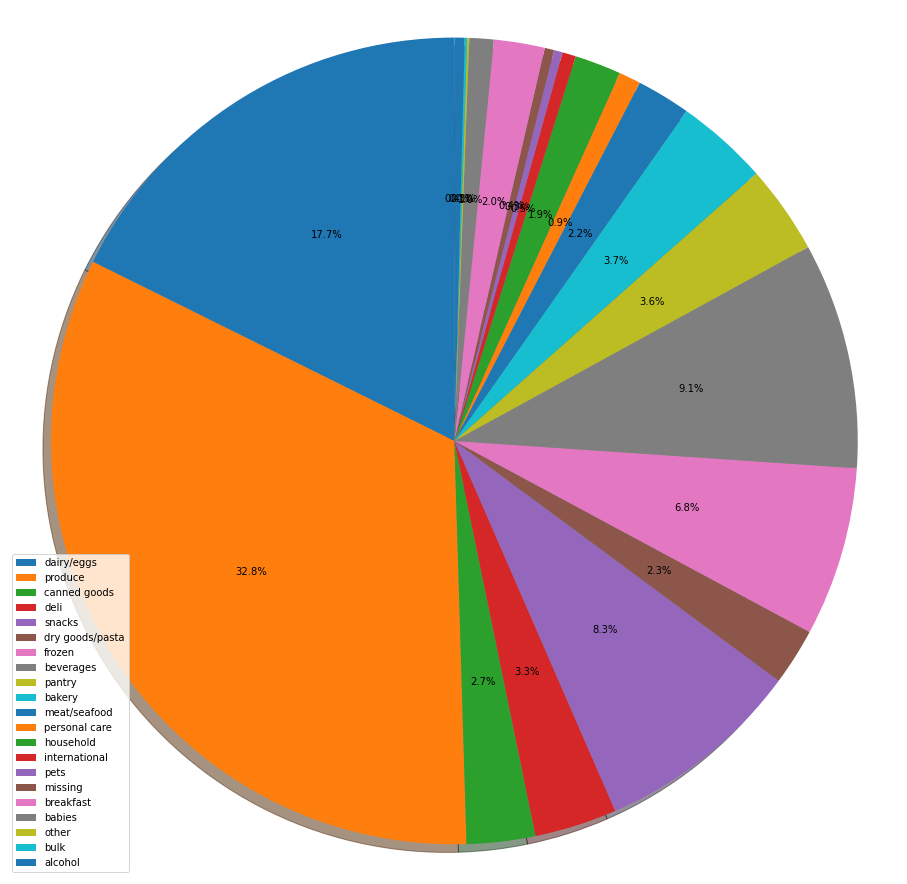

In [17]:

######## pie chart of reordered departments, counts from Liz and Victoria's code

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['dairy/eggs', 'produce', 'canned goods', 'deli', 'snacks', 'dry goods/pasta', 'frozen', 'beverages', 'pantry',
         'bakery', 'meat/seafood', 'personal care', 'household', 'international', 'pets', 'missing', 'breakfast', 
          'babies','other', 'bulk', 'alcohol' ]

sizes = [146502, 271886, 22782, 27367, 69102, 18885, 56168, 75060, 29498, 30692, 17907, 7271, 15372, 4522, 
         2834, 3149, 16864, 8084, 697, 786, 3397]
#explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.figure(figsize=(16,16))
#fig1, ax1 = plt.subplots()
plt.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels=labels)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('piechart.png')